<a href="https://colab.research.google.com/github/simon-mellergaard/datasimon/blob/main/datasets/Laptop_data_simluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset simulator

Computer prices

In [75]:
import pandas as pd
import numpy as np
import math

NROWS = 1000

# Simulate a more advanced dataset
data = {
    'ID': range(1, NROWS+1),
    'Model_year': 2025 - np.random.binomial(20, 0.3, NROWS),
    'Memory_GB': np.random.choice([4, 6, 8, 12, 16, 32], NROWS, p=[0.15, 0.04, 0.4, 0.04, 0.25, 0.12]),
    'Storage_GB': np.random.choice([120, 128, 256, 512, 1024, 2000], NROWS, p=[0.05, 0.15, 0.35, 0.3, 0.1, 0.05]),
}

data['Storage_type'] = [np.random.choice(['SSD', 'HDD'], 1, p=[0.5 + (i > 2017)*0.2, 0.5  - (i > 2017)*0.2])[0] for i in data['Model_year']]

def transf(i):
    # Transforms the year into a probability of being C grade
    return 1/(1+math.e**(0.5*(i-2020)))

data['Grade'] = [np.random.choice(['A', 'B', 'C'], 1, p=[2/3-(2*transf(i)/3), 1/3-(transf(i)/3), transf(i)])[0] for i in data['Model_year']]


def calc_price(row):
    base_price = round(np.random.randint(500, 1000), -2)
    ram = row['Memory_GB']
    storage = row['Storage_GB']
    grade = row['Grade']
    storage_type = row['Storage_type']
    if storage_type == 'SSD':
        storage_price = storage**0.9 * 1.36
    else:
        storage_price = storage**0.9
    grade_factor = 1
    if grade == 'A':
        grade_factor = 1.2
    elif grade == 'B':
        grade_factor = 1.12
    ram_price = ram * 30 * (1.25-np.random.random()/2)
    return round((base_price + storage_price  + ram_price) * grade_factor, -1)


df = pd.DataFrame(data, index=data['ID'])

df['Price'] = [calc_price(row) for _, row in df.iterrows()]

# Introduce some missing values
for col in ['Grade', 'Model_year']:
    df.loc[df.sample(frac=np.random.random()*0.03).index, col] = np.nan

# Display the first few rows and info
display(df.head())
display(df.info())

,ID,Model_year,Memory_GB,Storage_GB,Storage_type,Grade,Price
1,1,2019.0,12,1024,SSD,B,1740.0
2,2,2021.0,8,256,SSD,C,1030.0
3,3,2017.0,4,1024,SSD,C,1520.0
4,4,2013.0,8,256,HDD,C,1270.0
5,5,2020.0,16,128,SSD,B,1690.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   int64  
 1   Model_year    979 non-null    float64
 2   Memory_GB     1000 non-null   int64  
 3   Storage_GB    1000 non-null   int64  
 4   Storage_type  1000 non-null   object 
 5   Grade         972 non-null    object 
 6   Price         1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


None

In [76]:
# Save the dataset
df.to_csv('Laptop_data.csv', index=False)

# Inspecting the data

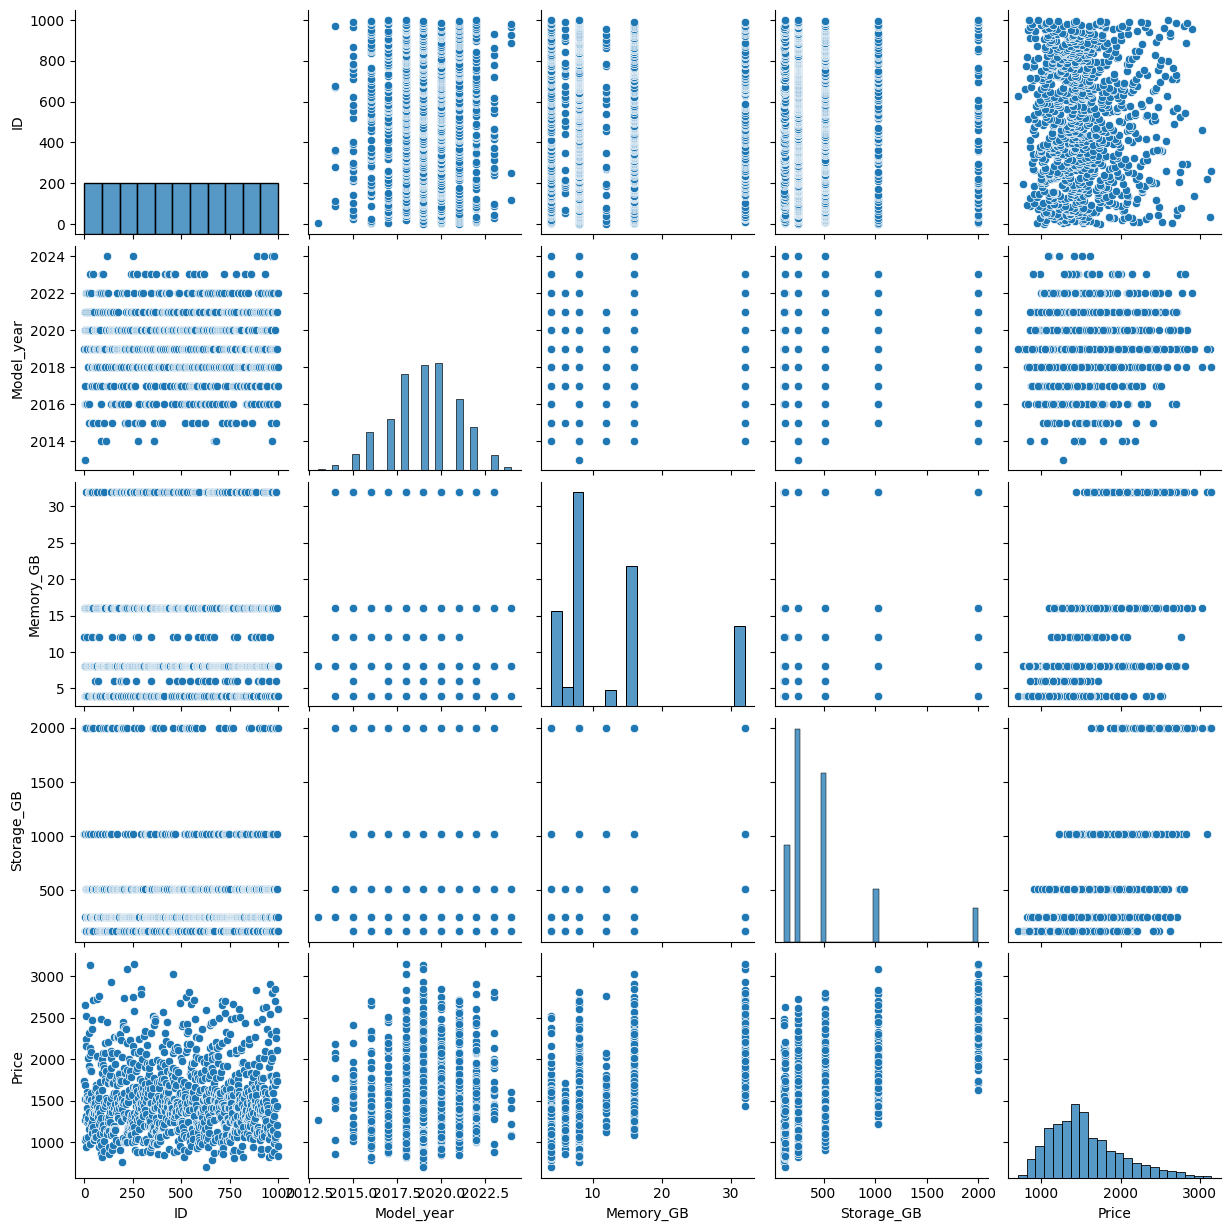

In [78]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Count'>

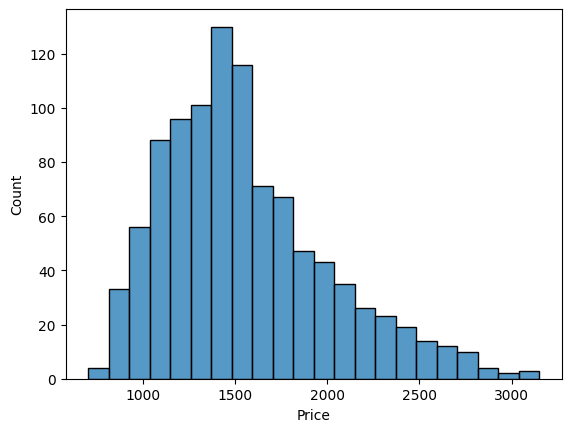

In [80]:
sns.histplot(df['Price'])